<a href="https://colab.research.google.com/github/brunofbpaula/BuildingRelationalDatabase/blob/main/analiseexploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cure Sharp

A solução adotada pelo grupo Cure Sharp engloba o esforço em reduzir a mortalidade materna e infantil, de acordo com as metas da ODS 3. Para isso, focaremos no período pré-natal da gestação, visando fazer análises da saúde da gestante e do feto, afim de prever e classificar o risco de vida de ambos durante a gestação.

Para isso, adotaremos dois datasets — um para identificar pré-eclampsia em gestantes, uma potencial complicação perigosa caracterizada pelo aumento da pressão sanguínea durante a gravidez, e um para avaliar a saúde e desenvolvimento geral do feto.


In [99]:
import pandas as pd
import numpy as np

## Integrantes Cure Sharp

In [100]:
curesharp_members = {
    'RM': ['552226', '552489', '551905', '99708', '550782'],
    'Nome': ['Bruno Francisco Brito de Paula', 'Felipe de Almeida Cardoso',
             'Gabriel Barroso de Assis França', 'Gabriel Francisco Lobo',
             'Kayque Lima Nunes'],
    'Turma': ['1TDSPW', '1TDSPK', '1TDSPW', '1TDSPF', '1TDSPW']
}
curesharp = pd.DataFrame(curesharp_members)
curesharp.set_index('RM', inplace=True)
curesharp

,Nome,Turma
RM,,
552226,Bruno Francisco Brito de Paula,1TDSPW
552489,Felipe de Almeida Cardoso,1TDSPK
551905,Gabriel Barroso de Assis França,1TDSPW
99708,Gabriel Francisco Lobo,1TDSPF
550782,Kayque Lima Nunes,1TDSPW


# Análise Estatística Exploratória

Apresentando as bases de dados e explorando os dados.

A análise contém gráficos:

• Heat Map

• Plair plot

• Count plot

• Histogram plot

• Swarm plot

• Boxenplot

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

## Datasets

Ambos datasets foram retirados do Kaggle.

Maternal Health Risk Data: https://www.kaggle.com/datasets/csafrit2/maternal-health-risk-data;

Fetal Health Classification: https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification

## Maternal Health Risk

Os dados deste dataset foram coletados de diferentes hospitais, clínicas, e serviços de cuidado materno através de sistemas de monitoramento de risco IoT.

O artigo científico sobre o modelo de predição original foi desenvolvido no contexto da Indonésia, em Bangladesh. Ele está disponível em: https://ieeexplore.ieee.org/document/9350320.

É importante frisar que, apesar de serem dados de outra localidade, os padrões de saúde do sangue são universais, portanto, não há diferença significativa no resultado, até porque o dataset não contém uma coluna de etnia.

O modelo possui confiabilidade de 97%, um ótimo percentual, levando em consideração que um quinto das mulheres que morrem durante a gravidez morrem no Sul da Ásia.

In [102]:
# Lendo o arquivo
maternal_health = pd.read_csv('datasets/Maternal Health Risk Data Set.csv')
maternal_health.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


Podemos observar que o DataFrame contém as colunas Idade, Pressão Sanguínea Sistólica (Pressão Máxima), Pressão Sanguínea Diastólica (Pressão Mínima), Nível de Glicose no Sangue, Temperatura Corporal, Frequência Cardíaca e o Nível de Risco.

As unidades de medida são, respectivamente, anos, mmHg, mmHg, mmol/L, Fahrenheit, batidas por minuto e três níveis de risco.

In [103]:
# Convertendo temperatura para Celsius
def converte_celsius(row):
  row= (row-32)/1.8
  return round(row, 2)

# Aplicando
maternal_health['BodyTemp'] = maternal_health['BodyTemp'].apply(converte_celsius)
maternal_health.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,36.67,86,high risk
1,35,140,90,13.0,36.67,70,high risk
2,29,90,70,8.0,37.78,80,high risk
3,30,140,85,7.0,36.67,70,high risk
4,35,120,60,6.1,36.67,76,low risk


In [104]:
# Verificando valores máximos e mínimos
for column in maternal_health:
  if column != 'RiskLevel':
    print(f'Valores máximo e mínimo da coluna {column}: {maternal_health[column].max()} e {maternal_health[column].min()}')

Valores máximo e mínimo da coluna Age: 70 e 10
Valores máximo e mínimo da coluna SystolicBP: 160 e 70
Valores máximo e mínimo da coluna DiastolicBP: 100 e 49
Valores máximo e mínimo da coluna BS: 19.0 e 6.0
Valores máximo e mínimo da coluna BodyTemp: 39.44 e 36.67
Valores máximo e mínimo da coluna HeartRate: 90 e 7


### Gráficos

Explorando a relação entre as variáveis.

<Axes: title={'center': 'Relacionamento das Variáveis'}>

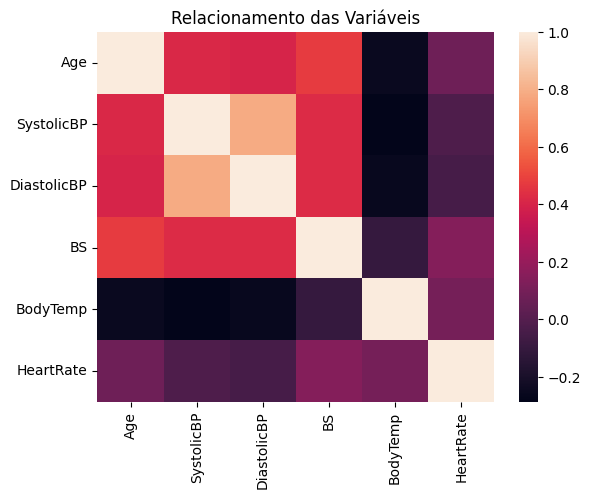

In [ ]:
# Mapa de Calor
ax = plt.axes()
ax.set_title('Relacionamento das Variáveis')
sns.heatmap(maternal_health.corr(numeric_only=True), ax = ax)

Podemos observar que a correlação entre a pressão máxima e mínima são fatores chave para chegar a um diagnóstico, visto seu forte relacionamento.

Text(0.5, 1.05, 'Dispersões - Nível de Glicose, Frequência Cardíaca e Idade')

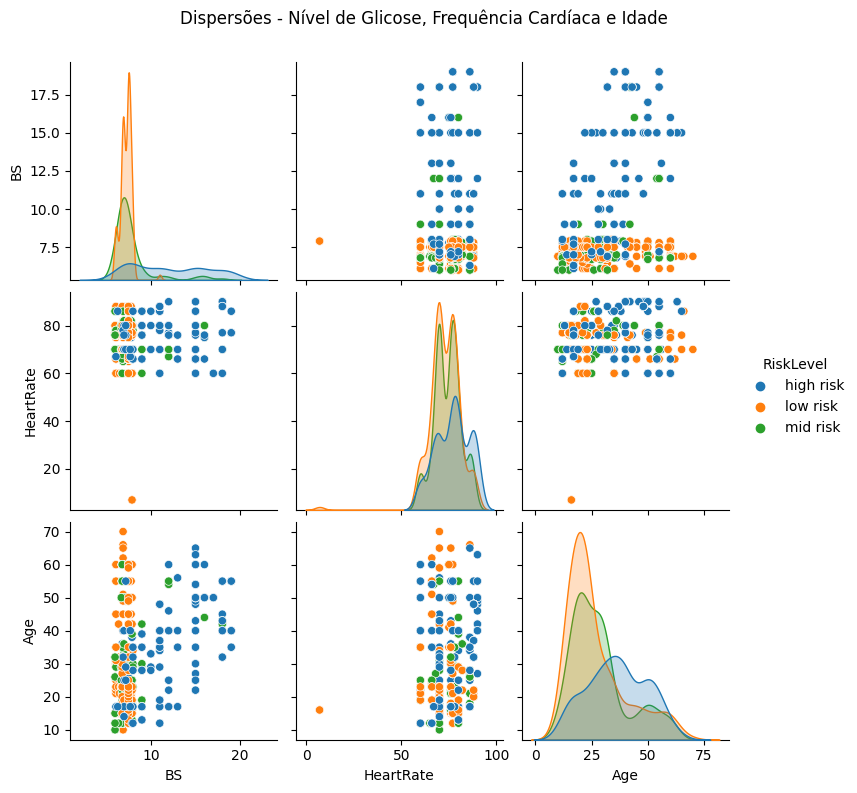

In [ ]:
# Pairplot do relacionamento
sns.pairplot(maternal_health[['BS', 'HeartRate', 'RiskLevel', 'Age']], hue='RiskLevel').fig.suptitle('Dispersões - Nível de Glicose, Frequência Cardíaca e Idade', y=1.05)

É possível extrair vários insights deste gráfico, como por exemplo:

Quanto menor o nível de glicose no sangue, maior o risco da gravidez;

A maior parte das gestações de risco se concentram nas mulheres entre 30 e 10 anos de idade;

Quanto menor a frequência cardíaca da gestante, maior o risco da gravidez.



## Fetal Health

Este dataset é uma coleção de registros de exames de cardiotocografia que foram classificados por obstetras experientes.O contexto da base de dados é de Porto, em Portugal.

Essa solução foi implementada com processamento automático de cardiotogramas, que são exames simples e de custo acessível para monitoramento da saúde do feto.

O equipamento em si funciona enviando pulsos ultrasonoros e lendo a resposta, revelando a frequência cardíaca, movimentos do feto e contrações uterinas.

O artigo pode ser encontrado em https://onlinelibrary.wiley.com/doi/10.1002/1520-6661(200009/10)9:5%3C311::AID-MFM12%3E3.0.CO;2-9.


In [105]:
# Lendo arquivo
fetal_health = pd.read_csv('datasets/fetal_health.csv')
fetal_health.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [106]:
# O dataset contém um grande número de colunas, que estão relacionadas com as
# características de um cardiotograma, sendo o rótulo a saúde do feto
for column in fetal_health.columns:
  print(column)

baseline value
accelerations
fetal_movement
uterine_contractions
light_decelerations
severe_decelerations
prolongued_decelerations
abnormal_short_term_variability
mean_value_of_short_term_variability
percentage_of_time_with_abnormal_long_term_variability
mean_value_of_long_term_variability
histogram_width
histogram_min
histogram_max
histogram_number_of_peaks
histogram_number_of_zeroes
histogram_mode
histogram_mean
histogram_median
histogram_variance
histogram_tendency
fetal_health


As unidades de medida são, respectivamente: batimentos por minuto, acelerações por segundo, movimentos por segundo, contrações por segundo, desacelerações leves por segundo, desacelerações graves por segundo, desacelerações prolongadas por segundo.

In [107]:
# A saída está em float, vamos converter para dar display em uma String
def converte_string(item):
  if item == 1:
    item = 'Normal'
  elif item == 2:
    item = 'Suspect'
  elif item == 3:
    item = 'Pathological'
  return item

fetal_health['fetal_health'] = fetal_health['fetal_health'].apply(converte_string)
fetal_health['fetal_health'].head(15)

0          Suspect
1           Normal
2           Normal
3           Normal
4           Normal
5     Pathological
6     Pathological
7     Pathological
8     Pathological
9     Pathological
10         Suspect
11         Suspect
12          Normal
13          Normal
14          Normal
Name: fetal_health, dtype: object

### Gráficos

Explorando os relacionamentos.

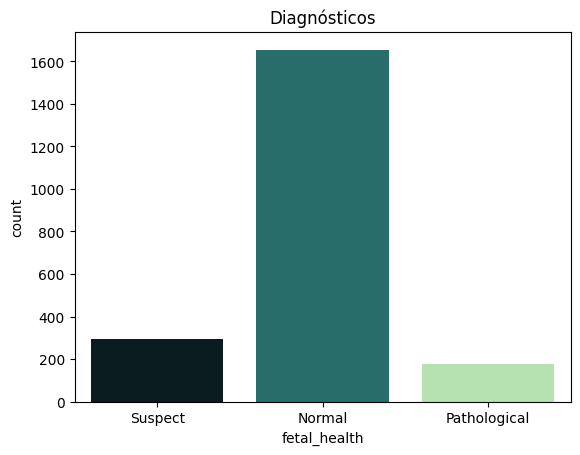

In [ ]:
# Descobrindo a população por rótulo
cores =["#071E22","#1D7874", "#afeaaa"]
ax = plt.axes()
ax.set_title('Diagnósticos')
sns.countplot(data=fetal_health, x="fetal_health", palette=cores, ax = ax)
plt.show()

Temos uma maior população de fetos saudáveis, e um nível similar de suspeitos e patológicos.

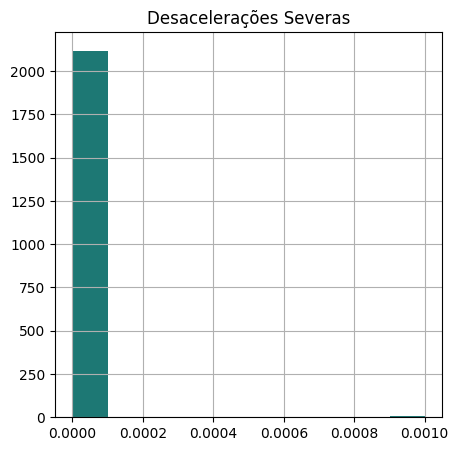

In [ ]:
# Histograma
data_hist_plot = fetal_health['severe_decelerations'].hist(figsize = (5, 5), color = "#1D7874").set_title('Desacelerações Severas')

Podemos extrair de insight é assimetria (skewness), a distribuição dos valores, que podem ser positivas ou negativas caso estejam mais presente à esquerda ou a direita, respectivamente.

Apenas um pequeno contigente de fetos apresentaram desacelerações severas no batimento cardíaco. É possível investigar a relação com a saúde fetal:

In [ ]:
# Filtrando apenas fileiras onde a desaceleração da
# frequência cardíaca é de 0.001
fetal_health[fetal_health['severe_decelerations'] >= 0.001]

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
1488,132.0,0.002,0.000,0.008,0.000,0.001,0.001,31.0,1.4,0.0,...,61.0,163.0,5.0,0.0,99.0,121.0,129.0,94.0,1.0,Normal
1489,132.0,0.000,0.000,0.006,0.000,0.001,0.001,32.0,1.3,0.0,...,60.0,151.0,1.0,1.0,99.0,116.0,125.0,72.0,1.0,Pathological
1791,121.0,0.000,0.001,0.004,0.010,0.001,0.000,66.0,2.1,0.0,...,55.0,160.0,7.0,0.0,67.0,85.0,92.0,109.0,-1.0,Pathological
1792,121.0,0.000,0.001,0.003,0.011,0.001,0.000,67.0,2.1,0.0,...,55.0,157.0,4.0,1.0,67.0,81.0,87.0,89.0,-1.0,Pathological
1793,121.0,0.000,0.001,0.005,0.012,0.001,0.000,66.0,2.1,0.0,...,55.0,157.0,5.0,1.0,67.0,83.0,90.0,98.0,-1.0,Pathological
1794,121.0,0.000,0.001,0.003,0.010,0.001,0.000,68.0,2.1,0.0,...,55.0,157.0,3.0,1.0,67.0,79.0,82.0,83.0,-1.0,Pathological
1795,121.0,0.000,0.000,0.004,0.009,0.001,0.000,70.0,1.9,0.0,...,55.0,157.0,6.0,2.0,67.0,76.0,79.0,68.0,-1.0,Pathological


De 7 fetos que apresentaram o nível mais alto de desaceleração, 6 apresentaram uma condição de saúde patológica. Logo, podemos concluir que este fator é muito próximo de ser determinante, mas não por completo.

O fato de existir um feto saudável dá brecha para investigação das demais variáveis e a diferença com os demais fetos.

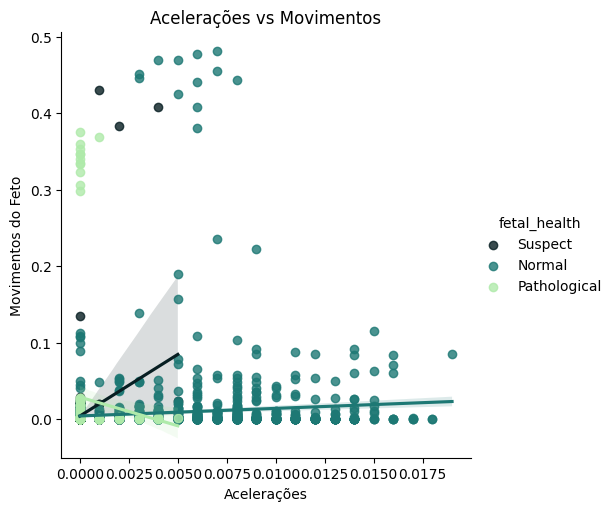

In [ ]:
# Implot
graph = sns.lmplot(data=fetal_health, x="accelerations", y="fetal_movement", palette=cores, hue="fetal_health", legend=True)
graph.set(title ="Acelerações vs Movimentos", xlabel='Acelerações', ylabel='Movimentos do Feto')
graph

Em média, fetos considerados patológicos apresentam menos acelerações que os normais, assim como os suspeitos.

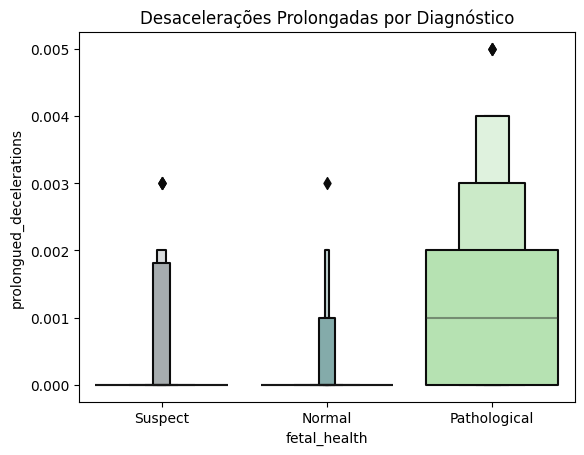

In [ ]:
# Swarmplot
sns.swarmplot(x=fetal_health["fetal_health"], y=fetal_health['prolongued_decelerations'], color="black", alpha=0.5, size=0.05)
sns.boxenplot(x=fetal_health["fetal_health"], y=fetal_health['prolongued_decelerations'], palette=cores).set_title('Desacelerações Prolongadas por Diagnóstico')
plt.show()

Em média, os patológicos também sofrem desacelerações mais prolongadas que as demais condições.

# Treinamento dos Modelos

Ambos são modelos supervisionados de classificação.

In [130]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report

## Modelo de predição de risco de gravidez
Todo processo de criação e análise do modelo.

### Separação de dados

Separando colunas preditivas e alvo.

In [108]:
# Verificando DataFrame
maternal_health.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,36.67,86,high risk
1,35,140,90,13.0,36.67,70,high risk
2,29,90,70,8.0,37.78,80,high risk
3,30,140,85,7.0,36.67,70,high risk
4,35,120,60,6.1,36.67,76,low risk


In [123]:
# Renomeando colunas e rótulo, afim de melhor leitura
maternal_health.rename(columns={'Age': 'Idade', 'SystolicBP': 'PSistolica',
                                'DiastolicBP': 'PDiastolica', 'BS': 'NivelGlicose', 'BodyTemp': 'TemperaturaCorporal',
                                'HeartRate': 'FrequenciaCardiaca', 'RiskLevel': 'NivelRisco'}, inplace=True)

# Traduzindo o nível de risco
def pt_br(item):
  if item == 'low risk':
    item = 'baixo risco'
  elif item == 'mid risk':
    item = 'médio risco'
  elif item == 'high risk':
    item = 'alto risco'
  return item


maternal_health['NivelRisco'] = maternal_health['NivelRisco'].apply(pt_br)
maternal_health.head()

,Idade,PSistolica,PDiastolica,NivelGlicose,TemperaturaCorporal,FrequenciaCardiaca,NivelRisco
0,25,130,80,15.0,36.67,86,alto risco
1,35,140,90,13.0,36.67,70,alto risco
2,29,90,70,8.0,37.78,80,alto risco
3,30,140,85,7.0,36.67,70,alto risco
4,35,120,60,6.1,36.67,76,baixo risco


Neste dataset, há duas fileiras que contém um valor sem sentido para frequência cardíaca, de 7bpm. A frequência normal de um adulto fica entre 60 e 100 batidas por minuto, e o registro mais baixo da história é de 25bpm.

Esses valores comprometem a precisão do algoritmo, e por isso serão excluídos, por provavelmente serem um erro de input.

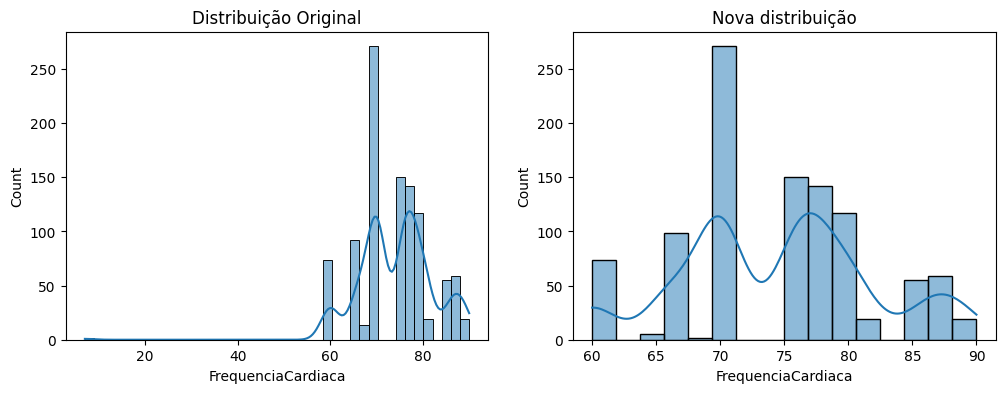

In [132]:
# Dropando fileiras sem sentido
new = maternal_health.drop(maternal_health.index[maternal_health.FrequenciaCardiaca == 7])

# Comparando distribuições
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(data=maternal_health, x="FrequenciaCardiaca", kde=True, ax=ax[0])
sns.histplot(data=new, x="FrequenciaCardiaca", kde=True, ax=ax[1])
ax[0].set_title("Distribuição Original")
ax[1].set_title("Nova distribuição")
plt.show()

In [133]:
# Aplicando no DataFrame original
maternal_health = maternal_health.drop(maternal_health.index[maternal_health.FrequenciaCardiaca == 7])

# Separando entradas da saída
x = maternal_health.drop(columns='NivelRisco')
y = maternal_health['NivelRisco']

# Conjunto de treinamento e conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

# Input
x_train.head(10)

,Idade,PSistolica,PDiastolica,NivelGlicose,TemperaturaCorporal,FrequenciaCardiaca
479,15,120,80,7.90,36.67,70
47,23,90,60,7.50,36.67,76
530,48,120,80,11.00,36.67,88
1006,17,85,60,6.30,38.89,86
19,10,70,50,6.90,36.67,70
714,17,90,63,6.90,38.33,70
782,25,120,80,6.80,36.67,66
341,45,90,60,18.00,38.33,70
685,14,90,65,7.00,38.33,70
678,23,140,80,7.01,36.67,70


In [134]:
# Output
y_train.head(10)

479     baixo risco
47      baixo risco
530      alto risco
1006     alto risco
19      baixo risco
714     médio risco
782     médio risco
341      alto risco
685      alto risco
678      alto risco
Name: NivelRisco, dtype: object

### Random Forest
Lida melhor com 'outliers', valores que se distanciam da média de uma amostra da população.

In [150]:
# Objeto do classificador
rf = RandomForestClassifier(random_state=100)

# Treinamento
rf.fit(x_train, y_train)

# Predições
y_pred = rf.predict(x_test)

# Visualizando saídas
y_pred[:5]

array(['baixo risco', 'médio risco', 'baixo risco', 'alto risco',
       'médio risco'], dtype=object)

### Avaliação do modelo

Fazendo testes de qualidade e precisão.

In [155]:
# Metricas de Precisão, Recall, F1-Score e Acurácia.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  alto risco       0.95      0.94      0.94        64
 baixo risco       0.89      0.89      0.89        79
 médio risco       0.82      0.83      0.83        60

    accuracy                           0.89       203
   macro avg       0.89      0.89      0.89       203
weighted avg       0.89      0.89      0.89       203



O modelo se mostra extremamente eficiente na identificação de gestações de alto risco, chegando a uma precisão de 95%.

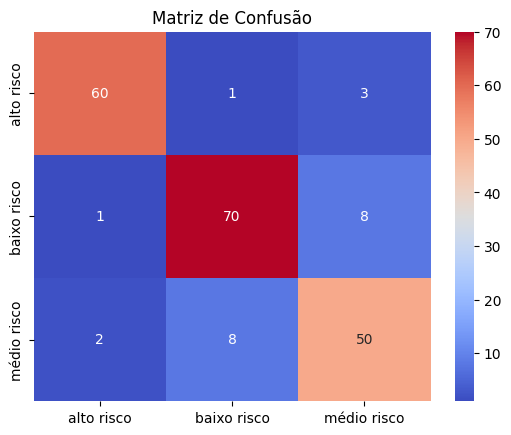

In [161]:
# Pegando rótulos
labels = np.unique(y_pred)

# Criando mapa de calor da matriz de confusão
ax = plt.axes()
ax.set_title('Matriz de Confusão')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, xticklabels=labels, yticklabels=labels, cmap="coolwarm", ax = ax)
plt.show()

### Exportando modelo
Persistência do modelo.

In [164]:
import pickle

with open('maternal_model.pickle', 'wb') as file:
    pickle.dump(rf, file)

print('Modelo salvo com sucesso.')

Modelo salvo com sucesso.


## Modelo de predição de risco de vida do feto